In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import eli5
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [ ]:
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


# **Some text data cleaning**

In [ ]:
import re 
regex = r'[A-Za-z]+'
def concat(headline):
  temp = list(headline)
  length = len(temp)
  res = ''
  for i in range(2,length):
    text = str(temp[i])
    res = res + ' ' + text.lower()
  return res

In [ ]:
for row in range(df.shape[0]):
  for column in range(2,df.shape[1]):
    text = str(df.iloc[row,column])
    words = re.findall(regex,text)
    words = list(filter(lambda a: a != 'b',words))
    text = ' '.join(words)
    df.iloc[row,column] = text.lower()

In [ ]:
df['top1_25'] = df.apply(concat,axis=1)

In [ ]:
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,top1_25
0,2008-08-08,0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n offici...,russian tanks have entered south ossetia whils...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but a s...,...,al qaeda faces islamist backlash,condoleezza rice the us would not act to preve...,this is a busy day the european union has appr...,georgia will withdraw soldiers from iraq to he...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in a series ...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge,georgia downs two russian warplanes as countr...


In [ ]:
df.Top1[0]

'georgia downs two russian warplanes as countries move to brink of war'

In [ ]:
df.top1_25[0]

' georgia downs two russian warplanes as countries move to brink of war breaking musharraf to be impeached russia today columns of troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital of south ossetia which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity u n official says this is sick a three year old was raped and they do nothing russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned it would intervene on so s side the enemy combatent trials are nothing but a sham salim haman has been sentenced to years but will be kept longer anyway just because they feel like it georgian troops retreat from s osettain capital presumably leaving several hundred people killed video did the u s prep georgia for war with russia rice gives green light for israel to attack iran says u s has no veto over israeli milit

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
def top_compound(text):
  sia = SentimentIntensityAnalyzer()
  return sia.polarity_scores(text)['compound']


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.Top1[0])['compound']


-0.5994

In [ ]:
df['top1_com'] = df['Top1'].apply(top_compound)
df['top2_com'] = df['Top2'].apply(top_compound)
df['top3_com'] = df['Top3'].apply(top_compound)
df['top4_com'] = df['Top4'].apply(top_compound)
df['top5_com'] = df['Top5'].apply(top_compound)

In [ ]:
df['top1_25_com'] = df['top1_25'].apply(top_compound)

In [ ]:
df.groupby('Label').count()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top23,Top24,Top25,top1_25,top1_com,top2_com,top3_com,top4_com,top5_com,top1_25_com
Label,,,,,,,,,,,,,,,,,,,,,
0,924,924,924,924,924,924,924,924,924,924,...,924,924,924,924,924,924,924,924,924,924
1,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,...,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065


In [ ]:
df[['Label','top1_com']][df['Label']==1]

,Label,top1_com
1,1,0.7964
4,1,0.2023
5,1,-0.7481
8,1,-0.2732
9,1,-0.3182
...,...,...
1982,1,0.3818
1985,1,0.8316
1986,1,0.0000
1987,1,0.0000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'top1-25 compound score(down)')

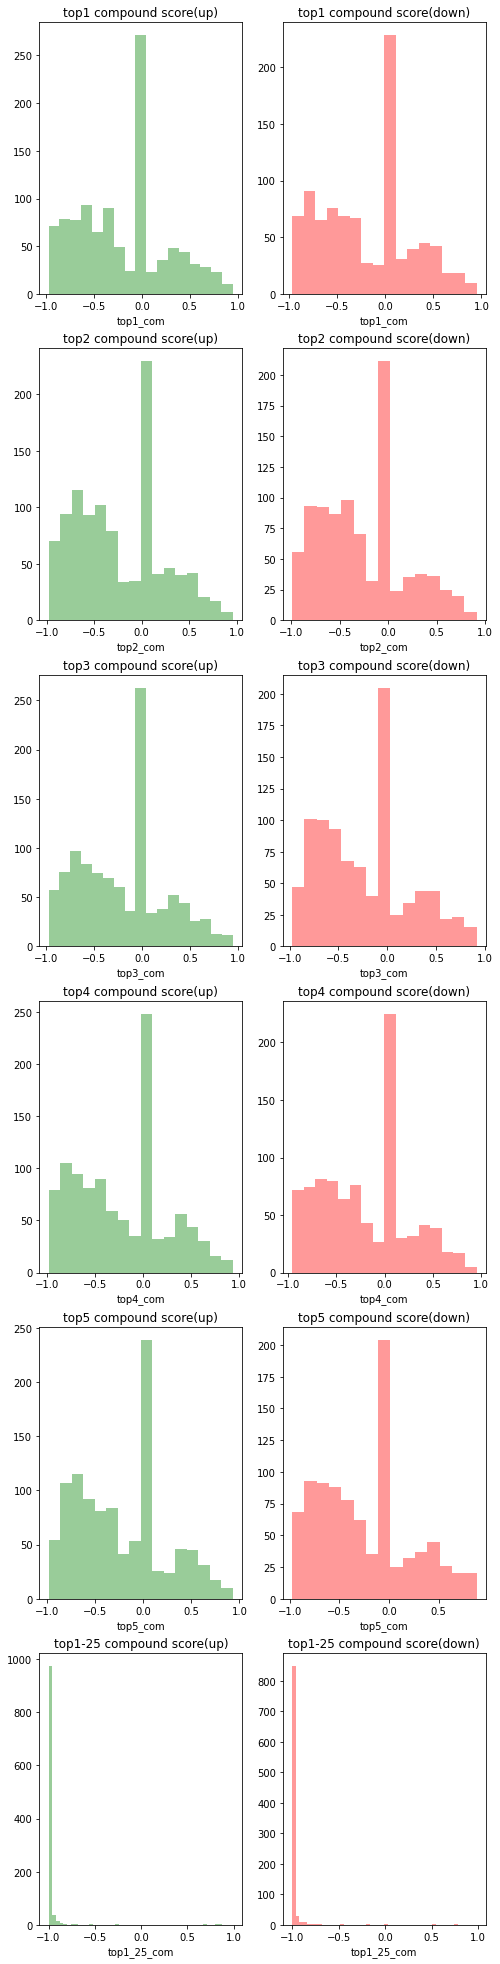

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#df = sns.load_dataset('iris')
fig, axs = plt.subplots(6,2,figsize=(8,35))
# Plot the histogram thanks to the distplot function
sns.distplot(ax=axs[0,0], a=df[['Label','top1_com']][df['Label']==1]['top1_com'], hist=True, kde=False, rug=False,color='green')
axs[0,0].set_title('top1 compound score(up)')
sns.distplot(ax=axs[0,1], a=df[['Label','top1_com']][df['Label']==0]['top1_com'], hist=True, kde=False, rug=False,color='red')
axs[0,1].set_title('top1 compound score(down)')

sns.distplot(ax=axs[1,0], a=df[['Label','top2_com']][df['Label']==1]['top2_com'], hist=True, kde=False, rug=False,color='green')
axs[1,0].set_title('top2 compound score(up)')
sns.distplot(ax=axs[1,1], a=df[['Label','top2_com']][df['Label']==0]['top2_com'], hist=True, kde=False, rug=False,color='red')
axs[1,1].set_title('top2 compound score(down)')

sns.distplot(ax=axs[2,0], a=df[['Label','top3_com']][df['Label']==1]['top3_com'], hist=True, kde=False, rug=False,color='green')
axs[2,0].set_title('top3 compound score(up)')
sns.distplot(ax=axs[2,1], a=df[['Label','top3_com']][df['Label']==0]['top3_com'], hist=True, kde=False, rug=False,color='red')
axs[2,1].set_title('top3 compound score(down)')

sns.distplot(ax=axs[3,0], a=df[['Label','top4_com']][df['Label']==1]['top4_com'], hist=True, kde=False, rug=False,color='green')
axs[3,0].set_title('top4 compound score(up)')
sns.distplot(ax=axs[3,1], a=df[['Label','top4_com']][df['Label']==0]['top4_com'], hist=True, kde=False, rug=False,color='red')
axs[3,1].set_title('top4 compound score(down)')

sns.distplot(ax=axs[4,0], a=df[['Label','top5_com']][df['Label']==1]['top5_com'], hist=True, kde=False, rug=False,color='green')
axs[4,0].set_title('top5 compound score(up)')
sns.distplot(ax=axs[4,1], a=df[['Label','top5_com']][df['Label']==0]['top5_com'], hist=True, kde=False, rug=False,color='red')
axs[4,1].set_title('top5 compound score(down)')

sns.distplot(ax=axs[5,0], a=df[['Label','top1_25_com']][df['Label']==1]['top1_25_com'], hist=True, kde=False, rug=False,color='green')
axs[5,0].set_title('top1-25 compound score(up)')
sns.distplot(ax=axs[5,1], a=df[['Label','top1_25_com']][df['Label']==0]['top1_25_com'], hist=True, kde=False, rug=False,color='red')
axs[5,1].set_title('top1-25 compound score(down)')


In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,top1_25,top1_com,top2_com,top3_com,top4_com,top5_com,top1_25_com
0,2008-08-08,0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n offici...,russian tanks have entered south ossetia whils...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but a s...,...,indian shoe manufactory and again in a series ...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge,georgia downs two russian warplanes as countr...,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,-0.9977
1,2008-08-11,1,why wont america and nato help us if they wont...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tra...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s ossetia blames...,...,perhaps the question about the georgia russia ...,russia is so much better at war,so this is what it s come to trading sex for food,why wont america and nato help us if they won...,0.7964,-0.3182,0.4404,-0.1965,0.0000,-0.9783
2,2008-08-12,0,remember that adorable year old who sang at th...,russia ends georgia operation,if we had no sexual harassment we would have n...,al qa eda is losing support in iraq because of...,ceasefire in georgia putin outmaneuvers the west,why microsoft and intel tried to kill the xo l...,stratfor the russo georgian war and the balanc...,i m trying to get a sense of this whole georgi...,...,christopher king argues that the us and nato a...,america the new mexico,bbc news asia pacific extinction by man not cl...,remember that adorable year old who sang at t...,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.9753
3,2008-08-13,0,u s refuses israel weapons to attack iran report,when the president ordered to attack tskhinval...,israel clears troops who killed reuters cameraman,britain s policy of being tough on drugs is po...,body of year old found in trunk latest ransom ...,china has moved million quake survivors into p...,bush announces operation get all up in russia ...,russian forces sink georgian ships,...,quarter of russians blame u s for conflict poll,georgian president says us military will take ...,nobel laureate aleksander solzhenitsyn accuses...,u s refuses israel weapons to attack iran rep...,-0.7184,-0.8074,-0.6369,-0.4215,-0.5106,-0.9818
4,2008-08-14,1,all the experts admit that we should legalise ...,war in south osetia pictures made by a russian...,swedish wrestler ara abrahamian throws away me...,russia exaggerated the death toll in south oss...,missile that killed inside pakistan may have b...,rushdie condemns random house s refusal to pub...,poland and us agree to missle defense deal int...,will the russians conquer tblisi bet on it no ...,...,russia world can forget about georgia s territ...,darfur rebels accuse sudan of mounting major a...,philippines peace advocate say muslims need as...,all the experts admit that we should legalise...,0.2023,-0.5994,0.6808,-0.8689,-0.6124,-0.9874


In [ ]:
text_up = " ".join(headline for headline in df[df['Label']==1]['top1_25'])
text_down = " ".join(headline for headline in df[df['Label']==0]['top1_25'])

In [ ]:
print ("There are {} words in the combination of all headline(up).".format(len(text_up)))
print ("There are {} words in the combination of all headline(down).".format(len(text_down)))

There are 2845786 words in the combination of all headline(up).
There are 2470597 words in the combination of all headline(down).


In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['s','u',''])

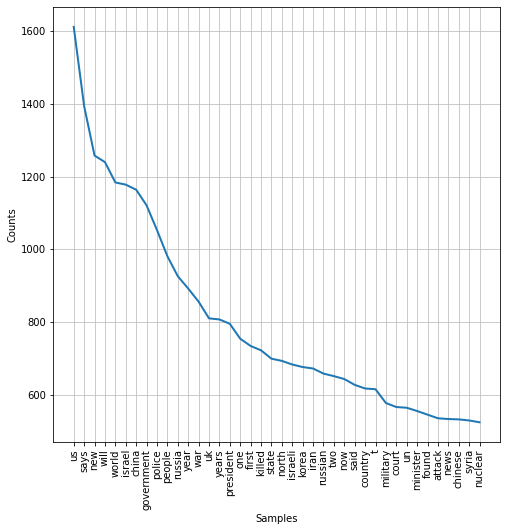

In [ ]:
text_up.split(' ')
words_up = []
words_down = []
for word in text_up.split(' '):
  if word not in stopwords:
    words_up.append(word)
for word in text_up.split(' '):
  if word not in stopwords:
    words_down.append(word)

freq_up = FreqDist(words_up)
plt.figure(figsize=(8,8))
freq_up.plot(40)

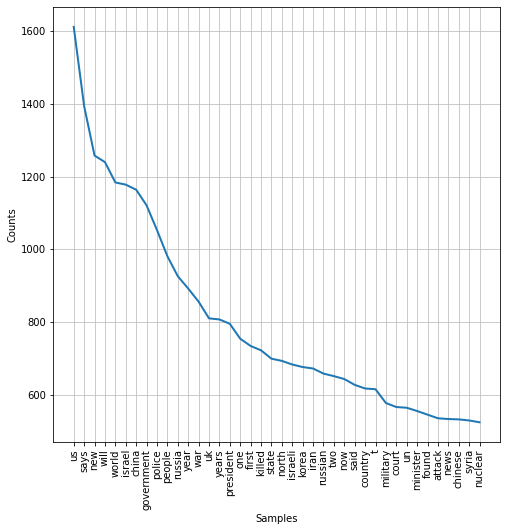

In [ ]:
freq_down = FreqDist(words_down)
plt.figure(figsize=(8,8))
freq_up.plot(40)

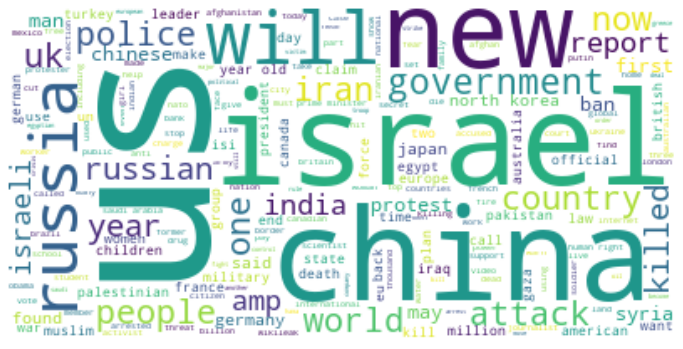

In [ ]:
# Create stopword list:
# Generate a word cloud image
stopwords.update(["say",'says'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_up)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


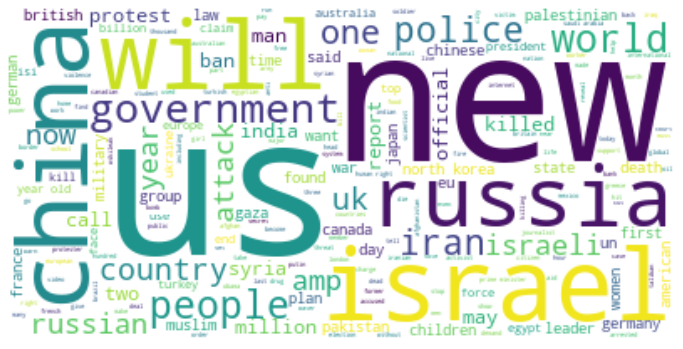

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_down)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def top_sia_neg(text):
  sia = SentimentIntensityAnalyzer()
  return sia.polarity_scores(text)['neg']
def top_sia_pos(text):
  sia = SentimentIntensityAnalyzer()
  return sia.polarity_scores(text)['pos']
def top_sia_neu(text):
  sia = SentimentIntensityAnalyzer()
  return sia.polarity_scores(text)['neu']

In [ ]:
df['subjectivity'] = df['top1_25'].apply(get_subjectivity)
df['polarity'] = df['top1_25'].apply(get_polarity)
df['neg'] = df['top1_25'].apply(top_sia_neg)
df['pos'] = df['top1_25'].apply(top_sia_pos)
df['neu'] = df['top1_25'].apply(top_sia_neu)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1989 non-null   object 
 1   Label         1989 non-null   int64  
 2   Top1          1989 non-null   object 
 3   Top2          1989 non-null   object 
 4   Top3          1989 non-null   object 
 5   Top4          1989 non-null   object 
 6   Top5          1989 non-null   object 
 7   Top6          1989 non-null   object 
 8   Top7          1989 non-null   object 
 9   Top8          1989 non-null   object 
 10  Top9          1989 non-null   object 
 11  Top10         1989 non-null   object 
 12  Top11         1989 non-null   object 
 13  Top12         1989 non-null   object 
 14  Top13         1989 non-null   object 
 15  Top14         1989 non-null   object 
 16  Top15         1989 non-null   object 
 17  Top16         1989 non-null   object 
 18  Top17         1989 non-null 

In [ ]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
print('Training dataset size:',train.shape[0])
print('Testing dataset size:',test.shape[0])

Training dataset size: 1863
Testing dataset size: 378


In [ ]:
headlines = list(train['top1_25'].values)
headlines[0]

' georgia downs two russian warplanes as countries move to brink of war breaking musharraf to be impeached russia today columns of troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital of south ossetia which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity u n official says this is sick a three year old was raped and they do nothing russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned it would intervene on so s side the enemy combatent trials are nothing but a sham salim haman has been sentenced to years but will be kept longer anyway just because they feel like it georgian troops retreat from s osettain capital presumably leaving several hundred people killed video did the u s prep georgia for war with russia rice gives green light for israel to attack iran says u s has no veto over israeli milit

**BoW**

In [ ]:
lr_model = LogisticRegression(C=0.1)
vec = CountVectorizer(ngram_range=(2,2))
pipe = make_pipeline(vec, lr_model)
pipe.fit(train['top1_25'].values,train['Label'])
train_preds = pipe.predict(train['top1_25'].values)
train_f1 = f1_score(train['Label'], train_preds, average='micro')
test_preds = pipe.predict(test['top1_25'].values)
test_f1 = f1_score(test['Label'], test_preds, average='micro')
score=accuracy_score(test['Label'],test_preds)
print(score)
report=classification_report(test['Label'],test_preds)
print(report)


0.8518518518518519
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       186
           1       0.83      0.89      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



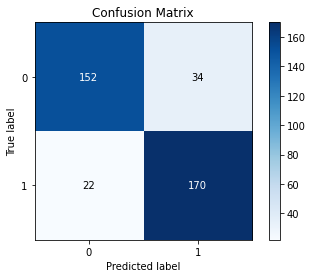

In [ ]:
plot_confusion_matrix(test['Label'],test_preds)

In [ ]:
eli5.show_weights(pipe, top=20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+0.236,<BIAS>
+0.181,and other
+0.172,that they
+0.169,will be
+0.163,have been
+0.156,in china
+0.148,time in
+0.138,dozens of
+0.137,likely to
+0.131,right to


In [ ]:
x = test['top1_25'].values[0]
x

' most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles diet or even inherited genes new research suggests random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues iran dismissed united states efforts to fight islamic state as a ploy to advance u s policies in the region the reality is that the united states is not acting to eliminate daesh they are not even interested in weakening daesh they are only interested in managing it poll one in germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden demanding that they be taken back to malm or some big city pakistani boat blows self up after india navy chase all four people on board the vessel from near the pakistani port city of karachi are believed to have been k

In [ ]:
print('True label:',test['Label'].values[1])
eli5.show_prediction(lr_model, test['top1_25'].values[1], vec=vec, target_names=['0','1'])

True label: 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])
test_transform= list(test['top1_25'].values)
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)
#matrix=confusion_matrix(test['Label'],predictions)
#print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



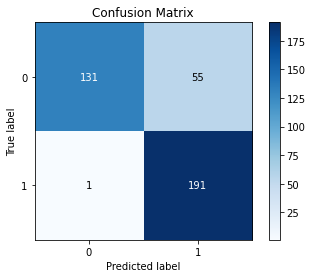

In [ ]:
plot_confusion_matrix(test['Label'],predictions)

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
NB=MultinomialNB()
NB.fit(traindataset,train['Label'])
test_transform= list(test['top1_25'].values)
test_dataset = countvector.transform(test_transform)
predictions = NB.predict(test_dataset)
#matrix=confusion_matrix(test['Label'],predictions)
#print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8412698412698413
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       186
           1       0.80      0.92      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



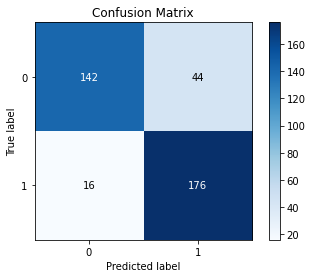

In [ ]:
plot_confusion_matrix(test['Label'],predictions)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

ensemble_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ensemble_classifier.fit(traindataset, train['Label'])


test_transform= list(test['top1_25'].values)
test_dataset = countvector.transform(test_transform)
predictions = ensemble_classifier.predict(test_dataset)

score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.7883597883597884
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       186
           1       0.77      0.82      0.80       192

    accuracy                           0.79       378
   macro avg       0.79      0.79      0.79       378
weighted avg       0.79      0.79      0.79       378



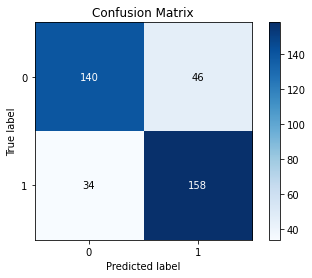

In [ ]:
plot_confusion_matrix(test['Label'],predictions)

**TF-IDF**

In [ ]:
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidf_bigram.fit_transform(headlines)
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])
test_transform= list(test['top1_25'].values)
test_dataset = tfidf_bigram.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)
#matrix=confusion_matrix(test['Label'],predictions)
#print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8386243386243386
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       186
           1       0.82      0.87      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



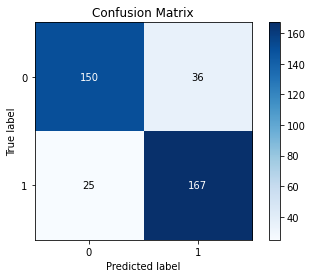

In [ ]:
plot_confusion_matrix(test['Label'],predictions)

In [ ]:
tfidf_bigram=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidf_bigram.fit_transform(headlines)
NB=MultinomialNB()
NB.fit(traindataset,train['Label'])
test_transform= list(test['top1_25'].values)
test_dataset = tfidf_bigram.transform(test_transform)
predictions = NB.predict(test_dataset)
#matrix=confusion_matrix(test['Label'],predictions)
#print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



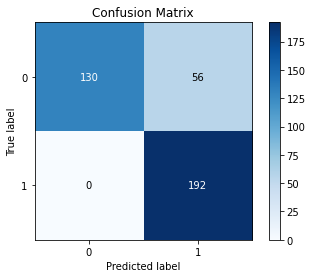

In [ ]:
plot_confusion_matrix(test['Label'],predictions)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
tfidf_bigram=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidf_bigram.fit_transform(headlines)
ensemble_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ensemble_classifier.fit(traindataset, train['Label'])
test_transform= list(test['top1_25'].values)
test_dataset = tfidf_bigram.transform(test_transform)
predictions = ensemble_classifier.predict(test_dataset)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.798941798941799
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       186
           1       0.83      0.77      0.79       192

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378



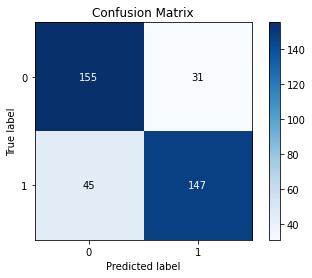

In [ ]:
plot_confusion_matrix(test['Label'],predictions)